In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Define parameters
ticker = 'BBSE3.SA'
start = '2013-01-01'
end = '2025-12-31'

In [43]:
df = yf.download(ticker, start = start , end = end)

[*********************100%***********************]  1 of 1 completed


In [44]:
print(df.head())

Price          Close      High       Low      Open    Volume
Ticker      BBSE3.SA  BBSE3.SA  BBSE3.SA  BBSE3.SA  BBSE3.SA
Date                                                        
2013-04-29  6.516572  6.653969  6.320289  6.653969  85582800
2013-04-30  6.693224  6.705002  6.516571  6.516571  26950200
2013-05-02  6.869879  6.869879  6.665746  6.673597  16057200
2013-05-03  6.968019  7.007275  6.818844  6.838472  13031000
2013-05-06  7.038682  7.062236  6.924838  6.968021  19911900


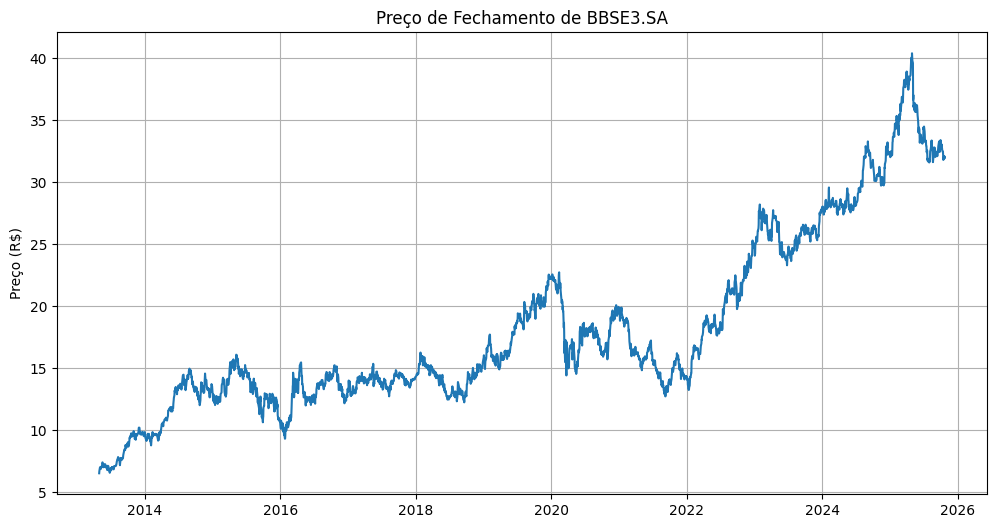

In [49]:
# Plot the closing price
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Preço de Fechamento')
plt.title(f'Preço de Fechamento de {ticker}')
plt.xlabel('')
plt.ylabel('Preço (R$)')
plt.grid()
plt.show()